In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data[['Z_CostContact', 'Z_Revenue']].value_counts() # unique value

Z_CostContact  Z_Revenue
3              11           2240
dtype: int64

In [ ]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

column grouping

In [ ]:
people_list = ['ID', 'Year_Birth', 'Education', 'Marital_Status',
               'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
               'Recency', 'Complain']
product_list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds']
promotion_list = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2',
                  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
place_list = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
              'NumWebVisitsMonth']

get duplicated

In [ ]:
data.shape

(2240, 27)

In [ ]:
data.iloc[:, 1:].duplicated().sum() # duplicate in 26 variety columns, need to drop

182

In [ ]:
dup = data.iloc[:, 1:].duplicated()
data = data[~dup]

# Univariate

people's data

In [ ]:
data['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [ ]:
data['Year_Birth'] = 2021 - data['Year_Birth']

In [ ]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
data['Education'].replace({'Basic': 'Undergraduation', '2n Cycle': 'Undergraduation',
                           'PhD': 'Postgraduation', 'Master': 'Postgraduation'},
                           inplace=True)

In [ ]:
data['Education'].value_counts()

Graduation         1030
Postgraduation      791
Undergraduation     237
Name: Education, dtype: int64

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

<ipython-input-36-c1db19e08176>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [ ]:
data['Dt_Customer'].sort_values()

724    2012-01-08
2194   2012-01-08
2029   2012-01-08
976    2012-01-08
1473   2012-01-09
          ...    
815    2014-12-05
216    2014-12-05
1257   2014-12-05
1952   2014-12-05
2003   2014-12-06
Name: Dt_Customer, Length: 2057, dtype: datetime64[ns]

<Axes: >

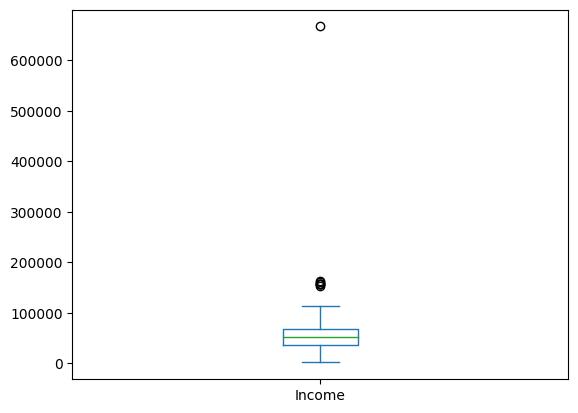

In [ ]:
data['Income'].plot.box()

In [ ]:
data['Income'].sort_values(ascending=False)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
          ...   
2078         NaN
2079         NaN
2081         NaN
2084         NaN
2228         NaN
Name: Income, Length: 2058, dtype: float64

In [ ]:
data.drop([2233], inplace=True)

<Axes: >

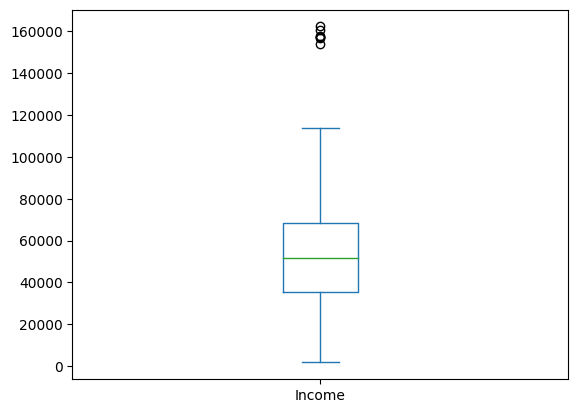

In [ ]:
data['Income'].plot.box()

In [ ]:
# have some income outliers, use median fill for more stable
data['Income'].fillna(value=data['Income'].median(), inplace=True)

In [ ]:
data['Marital_Status'].value_counts()

Married     795
Together    520
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
replace_list = {'Married': 1, 'Together': 1, 'Single': 0, 'Divorced': 0,
                'Widow': 0, 'Alone': 0, 'Absurd': 0, 'YOLO': 0}
data['Marital_Status'].replace(replace_list, inplace=True)

In [ ]:
data['Marital_Status'].value_counts() # 0 is alone, 1 otherwise

1    1315
0     742
Name: Marital_Status, dtype: int64

In [ ]:
data['Kidhome'].value_counts()

0    1293
1     898
2      48
Name: Kidhome, dtype: int64

In [ ]:
data['Teenhome'].value_counts()

0    1157
1    1030
2      52
Name: Teenhome, dtype: int64

<Axes: >

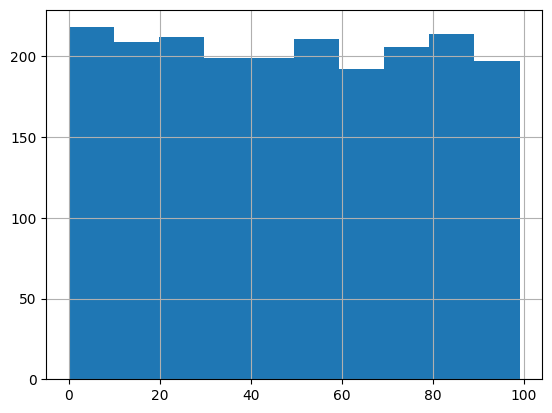

In [ ]:
data['Recency'].hist() # nearly uniform

product's data

In [ ]:
data[product_list]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2232,5,1,6,3,4,3
2235,709,43,182,42,118,247
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [ ]:
data[product_list].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,304.065143,26.240642,167.777346,37.343704,27.189596,43.888673
std,336.547172,39.759478,228.334873,54.666677,41.720151,52.134533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.000000,33.000000,230.000000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


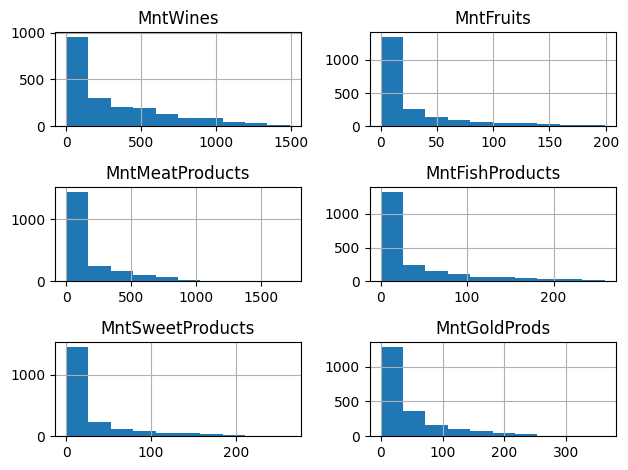

In [ ]:
data[product_list].hist()
plt.tight_layout()
plt.show()

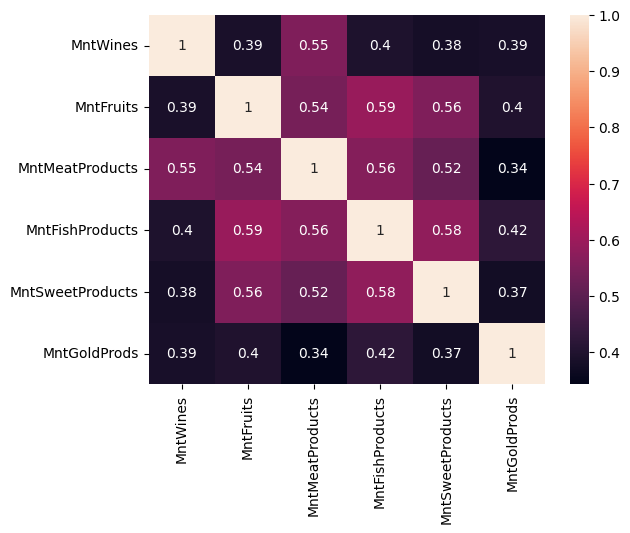

In [ ]:
sns.heatmap(data[product_list].corr(), annot=True)
plt.show()

In [ ]:
data['TotalAmount'] = data[product_list].sum(axis=1)

promotion's data

In [ ]:
data[promotion_list]

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2232,1,0,0,0,0,0,0
2235,2,0,0,0,0,0,0
2237,1,0,0,0,1,0,0
2238,2,0,0,0,0,0,0


In [ ]:
data[promotion_list].iloc[:, 1:].sum()

AcceptedCmp1    135
AcceptedCmp2     26
AcceptedCmp3    151
AcceptedCmp4    158
AcceptedCmp5    148
Response        313
dtype: int64

In [ ]:
new_data = data[promotion_list].copy()
new_data['Accepted'] = new_data.iloc[:, 1:].sum(axis=1)
new_data = new_data[['NumDealsPurchases', 'Accepted']]
new_data.corr().round(3)

,NumDealsPurchases,Accepted
NumDealsPurchases,1.000,-0.093
Accepted,-0.093,1.000


place's data

In [ ]:
data[place_list]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,8,10,4,7
1,1,1,2,5
2,8,2,10,4
3,2,0,4,6
4,5,3,6,5
...,...,...,...,...
2232,0,0,3,4
2235,9,3,4,5
2237,2,3,13,6
2238,6,5,10,3


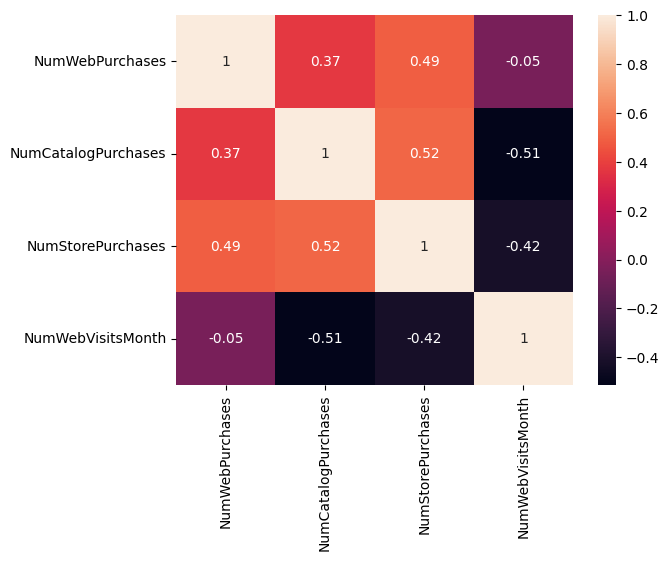

In [ ]:
sns.heatmap(data[place_list].corr(), annot=True)
plt.show()

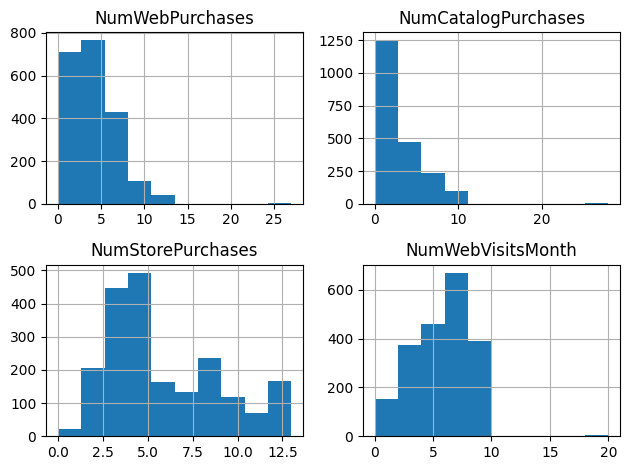

In [ ]:
data[place_list].hist()
plt.tight_layout()
plt.show()

# Multivariate

In [ ]:
# Complain column and others
data['Complain'].value_counts()

0    2037
1      20
Name: Complain, dtype: int64

In [ ]:
data.groupby('Complain')['Income'].mean()

Complain
0    52113.248895
1    45554.500000
Name: Income, dtype: float64

In [ ]:
data.groupby('Complain')['TotalAmount'].mean()

Complain
0    608.605793
1    392.550000
Name: TotalAmount, dtype: float64

In [ ]:
data.groupby('Complain')[place_list].mean()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Complain,,,,
0,4.103093,2.666667,5.776141,5.31566
1,3.700000,2.150000,5.350000,5.70000


In [ ]:
# Education column and others
data.groupby('Education')[product_list].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Graduation,283.472303,31.118562,181.591837,43.524781,31.736638,50.525753
Postgraduation,373.648546,20.265487,165.748420,28.548673,20.460177,36.048040
Undergraduation,161.236287,25.004219,114.569620,39.860759,29.907173,41.240506


In [ ]:
data.groupby('Education')['TotalAmount'].mean()

Education
Graduation         621.969874
Postgraduation     644.719343
Undergraduation    411.818565
Name: TotalAmount, dtype: float64

In [ ]:
temp = data.groupby('Education')[product_list].mean()
sum_ = temp.sum(axis=1)
temp.div(sum_, axis=0)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Graduation,0.455765,0.050032,0.291962,0.069979,0.051026,0.081235
Postgraduation,0.579552,0.031433,0.257086,0.044281,0.031735,0.055913
Undergraduation,0.391523,0.060717,0.278204,0.096792,0.072622,0.100142


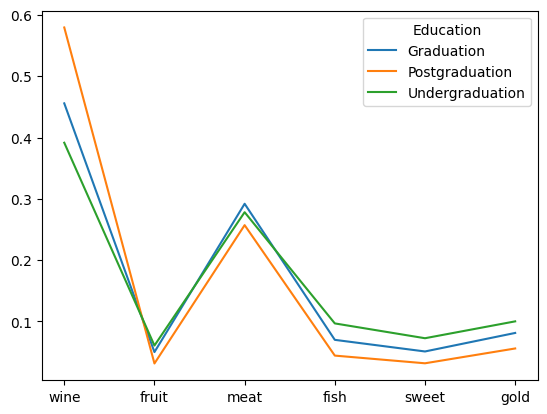

In [ ]:
ax = temp.div(sum_, axis=0).T.plot()
ax.set_xticks(np.arange(6))
ax.set_xticklabels(['wine', 'fruit', 'meat', 'fish', 'sweet', 'gold'])
plt.show()

In [ ]:
data.groupby('Education')[place_list].mean()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Education,,,,
Graduation,4.151603,2.737609,5.827017,5.281827
Postgraduation,4.249052,2.785082,5.945638,5.225032
Undergraduation,3.371308,1.919831,4.953586,5.797468


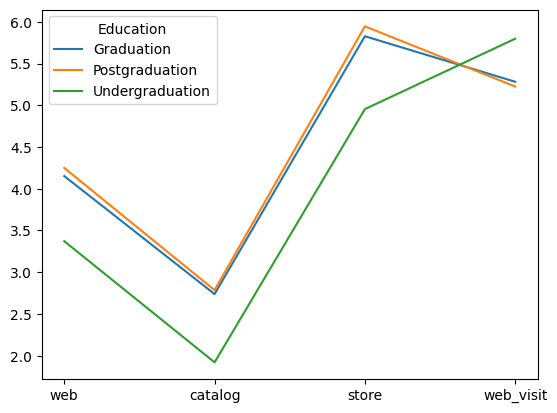

In [ ]:
ax = data.groupby('Education')[place_list].mean().T.plot()
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['web', 'catalog', 'store', 'web_visit'])
plt.show()

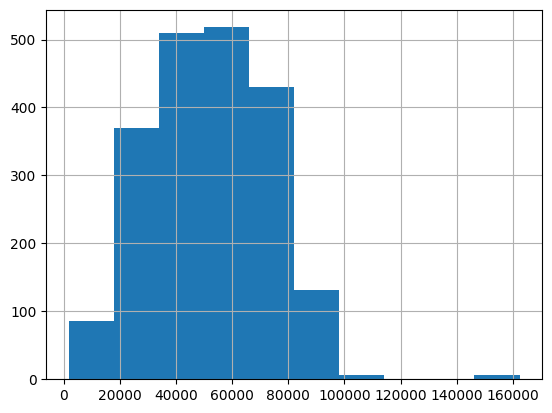

In [ ]:
# Income column and others
data['Income'].hist()
plt.show()

In [ ]:
data['IncomeCat'] = pd.cut(x=data['Income'], bins=[0, 30000, 70000, 100000, 200000],
                           labels=['0-30k', '30-70k', '70-100k', '100k+'])

In [ ]:
data.groupby('IncomeCat')[product_list].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
IncomeCat,,,,,,
0-30k,13.738872,5.703264,22.169139,7.946588,6.243323,17.329377
30-70k,256.243416,18.611333,102.052674,25.790104,17.822027,40.500399
70-100k,652.501099,62.254945,448.410989,91.081319,67.652747,72.725275
100k+,239.250000,34.083333,479.000000,31.750000,59.333333,50.166667


In [ ]:
data.groupby('IncomeCat')['TotalAmount'].mean()

IncomeCat
0-30k        73.130564
30-70k      461.019952
70-100k    1394.626374
100k+       893.583333
Name: TotalAmount, dtype: float64

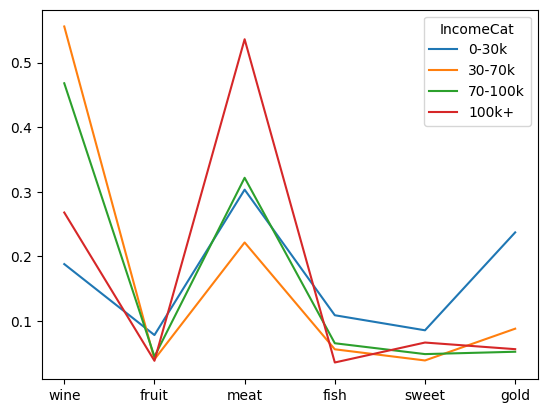

In [ ]:
temp = data.groupby('IncomeCat')[product_list].mean()
sum_ = temp.sum(axis=1)

ax = temp.div(sum_, axis=0).T.plot()
ax.set_xticks(np.arange(6))
ax.set_xticklabels(['wine', 'fruit', 'meat', 'fish', 'sweet', 'gold'])
plt.show()

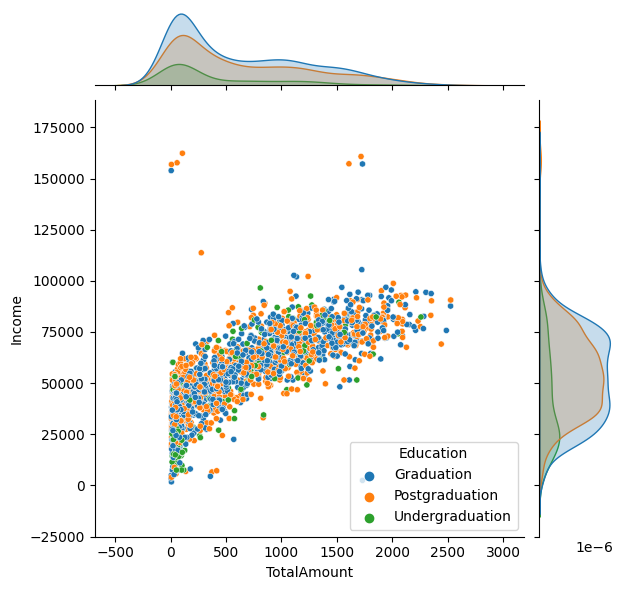

In [ ]:
sns.jointplot(x='TotalAmount', y='Income', hue='Education', data=data, s=20)
plt.show()

In [ ]:
data.groupby('IncomeCat')[place_list].mean()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
IncomeCat,,,,
0-30k,1.991098,0.486647,2.827893,7.151335
30-70k,4.233041,2.063049,5.629689,5.745411
70-100k,5.276923,5.745055,8.382418,2.896703
100k+,4.666667,9.333333,4.333333,1.250000


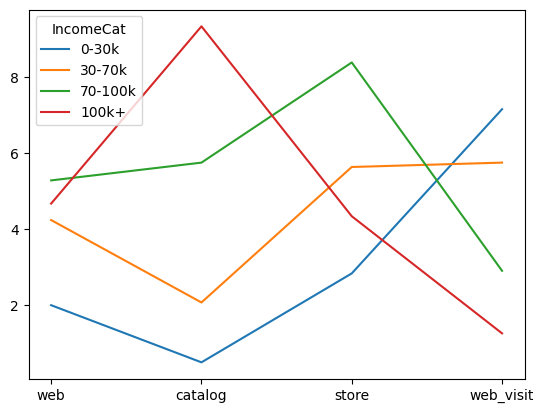

In [ ]:
ax = data.groupby('IncomeCat')[place_list].mean().T.plot()
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['web', 'catalog', 'store', 'web_visit'])
plt.show()

In [ ]:
# Kidhome and others
data.groupby('Kidhome')[product_list].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,453.388514,39.364865,255.972128,56.022804,40.685811,59.734797
1,103.473494,8.493976,48.955422,12.214458,9.078313,22.636145
2,64.348837,7.418605,32.883721,8.069767,5.162791,17.790698


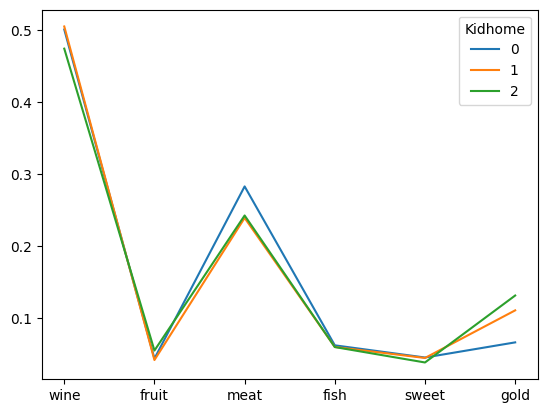

In [ ]:
temp = data.groupby('Kidhome')[product_list].mean()
sum_ = temp.sum(axis=1)

ax = temp.div(sum_, axis=0).T.plot()
ax.set_xticks(np.arange(6))
ax.set_xticklabels(['wine', 'fruit', 'meat', 'fish', 'sweet', 'gold'])
plt.show()

In [ ]:
data.groupby('Kidhome')['NumDealsPurchases'].mean()

Kidhome
0    1.960304
1    2.865060
2    2.581395
Name: NumDealsPurchases, dtype: float64

In [ ]:
data.groupby('Kidhome')[place_list].mean()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Kidhome,,,,
0,5.004223,3.960304,7.205236,4.357264
1,2.884337,0.913253,3.851807,6.626506
2,2.627907,0.651163,3.372093,6.581395


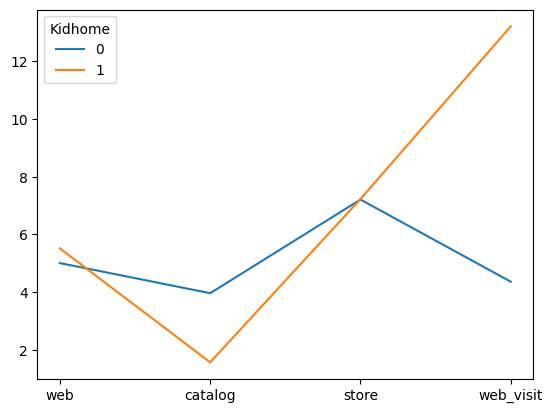

In [ ]:
temp = data.groupby('Kidhome')[place_list].mean()
temp.loc[1] += temp.loc[2]
temp = temp.loc[[0, 1]]

ax = temp.T.plot()
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['web', 'catalog', 'store', 'web_visit'])
plt.show()

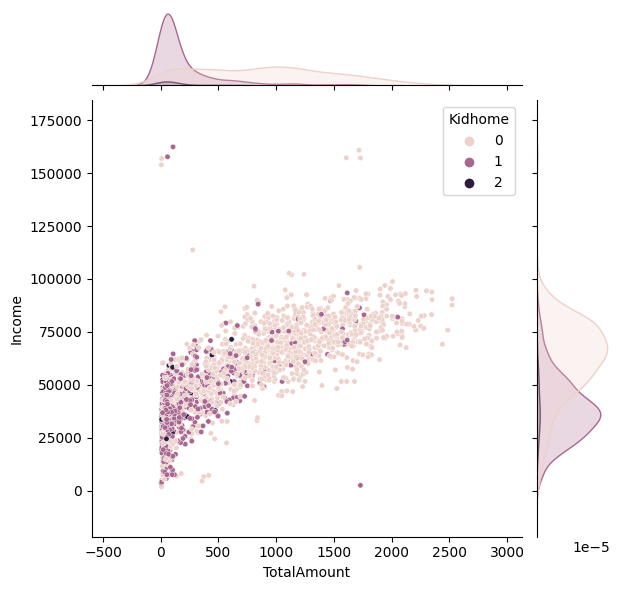

In [ ]:
sns.jointplot(x='TotalAmount', y='Income', hue='Kidhome', data=data, s=15)
plt.show()

# Extract to file

In [ ]:
data.shape

(2057, 29)

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalAmount', 'IncomeCat'],
      dtype='object')

In [ ]:
path = '/content/drive/My Drive/MyFolder/'
file_name = 'cleaned_marketing.csv'

with open(path+file_name, 'w') as f:
    data.to_csv(f, index=False)